# Dependencies

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import sys
import os
from os import listdir
from os.path import isfile, isdir, join
pd.set_option('display.max_rows', 500)

import math
import umap
from sklearn.cluster import DBSCAN
import scipy.stats
import scipy.optimize as opt

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import PandasTools
# import xlsxwriter

from rdkit.ML.Cluster import Butina
from rdkit.Chem import rdMolDescriptors as rdmd
from rdkit.Chem import Descriptors
from rdkit.Chem.rdDepictor import Compute2DCoords
from rdkit.Chem import rdRGroupDecomposition
from rdkit.Chem.MolStandardize import rdMolStandardize
import mols2grid

import requests
lib_file = requests.get("https://raw.githubusercontent.com/PatWalters/practical_cheminformatics_tutorials/main/sar_analysis/scaffold_finder.py")
ofs = open("scaffold_finder.py","w")
print(lib_file.text,file=ofs)
ofs.close()
from scaffold_finder import generate_fragments, find_scaffolds, get_molecules_with_scaffold, cleanup_fragment
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score

import datamol as dm
from sort_and_slice_ecfp_featuriser import create_sort_and_slice_ecfp_featuriser
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics.pairwise import pairwise_distances
import brewer2mpl
from sklearn.datasets import make_blobs
import colorcet as cc
from SAR_utils import *

# Data Import

In [2]:
SAR_df = pd.read_excel(r"D:\project\conda_sar\MetaSar_Code_testversion\Results\JJ\MetaSAR_RGD_results/LR_SAR_final_Fib.xlsx")
decomposed_df = pd.read_excel(r"D:\project\conda_sar\MetaSar_Code_testversion\Results\JJ\MetaSAR_RGD_results/LR_decomposed_df_Fib.xlsx")
all_coefficients = pd.read_excel(r"D:\project\conda_sar\MetaSar_Code_testversion\Results\JJ\MetaSAR_RGD_results/LR_results_Fib.xlsx")

In [3]:
all_coefficients["mol"] = all_coefficients["SMILES"].apply(Chem.MolFromSmiles)

# Individual Plots

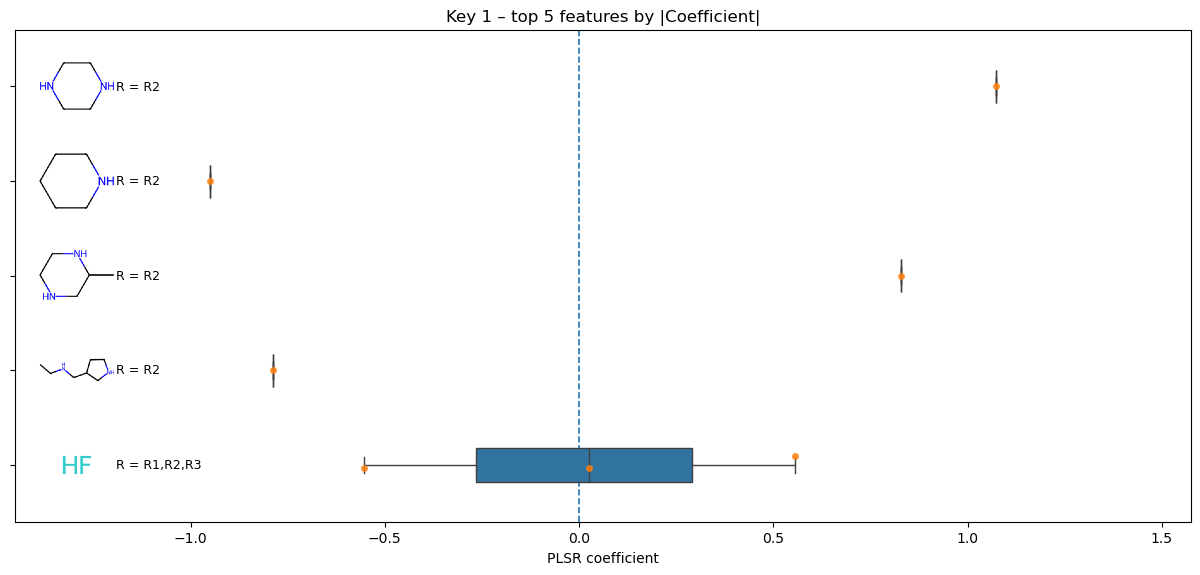


▶ Key = 1 | R_Location = R1


,ROMol,Feature,Coefficient,Absolute Coefficient,SMILES
0,<rdkit.Chem.rdchem.Mol object at 0x0000013811D...,[H][H]_R1_SMILES,-0.024638,0.024638,[H][H]
1,<rdkit.Chem.rdchem.Mol object at 0x0000013811D...,[H]F_R1_SMILES,0.024638,0.024638,[H]F



▶ Key = 1 | R_Location = R2


,ROMol,Feature,Coefficient,Absolute Coefficient,SMILES
0,<rdkit.Chem.rdchem.Mol object at 0x0000013811D...,[H]N1CCCCC1_R2_SMILES,-0.950651,0.950651,[H]N1CCCCC1
1,<rdkit.Chem.rdchem.Mol object at 0x0000013811D...,[H]N1CCC(CNCC)C1_R2_SMILES,-0.786771,0.786771,[H]N1CCC(CNCC)C1
2,<rdkit.Chem.rdchem.Mol object at 0x0000013811D...,[H]N1CCN(C)CC1_R2_SMILES,-0.431119,0.431119,[H]N1CCN(C)CC1
3,<rdkit.Chem.rdchem.Mol object at 0x0000013811D...,[H]F_R2_SMILES,0.554981,0.554981,[H]F
4,<rdkit.Chem.rdchem.Mol object at 0x0000013811D...,[H]N1CCNC(C)C1_R2_SMILES,0.827834,0.827834,[H]N1CCNC(C)C1
5,<rdkit.Chem.rdchem.Mol object at 0x0000013811D...,[H]N1CCNCC1_R2_SMILES,1.073139,1.073139,[H]N1CCNCC1



▶ Key = 1 | R_Location = R3


,ROMol,Feature,Coefficient,Absolute Coefficient,SMILES
0,<rdkit.Chem.rdchem.Mol object at 0x0000013811D...,[H]F_R3_SMILES,-0.554981,0.554981,[H]F
1,<rdkit.Chem.rdchem.Mol object at 0x0000013811D...,[H]N1CCOCC1_R3_SMILES,0.554981,0.554981,[H]N1CCOCC1



▶ Key = 1 | R_Location = R4


,ROMol,Feature,Coefficient,Absolute Coefficient,SMILES
0,<rdkit.Chem.rdchem.Mol object at 0x0000013811D...,[H]CC_R4_SMILES,-0.200174,0.200174,[H]CC
1,<rdkit.Chem.rdchem.Mol object at 0x0000013811D...,[H][H]_R4_SMILES,0.200174,0.200174,[H][H]


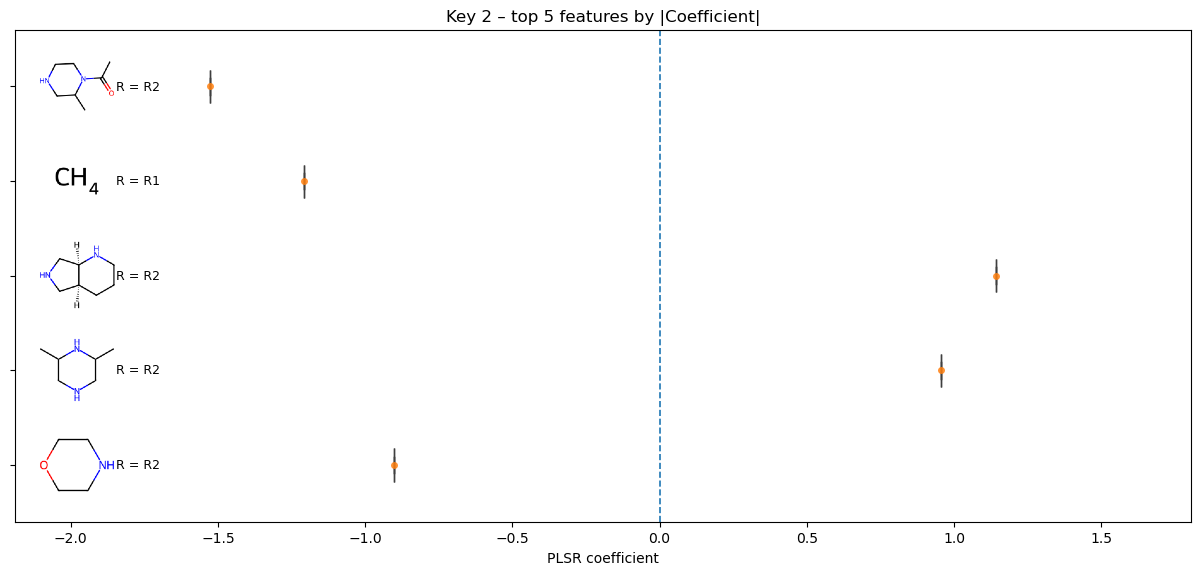


▶ Key = 2 | R_Location = R1


,ROMol,Feature,Coefficient,Absolute Coefficient,SMILES
0,<rdkit.Chem.rdchem.Mol object at 0x0000013811D...,[H]C_R1_SMILES,-1.208590,1.208590,[H]C
1,<rdkit.Chem.rdchem.Mol object at 0x0000013811D...,[H]N_R1_SMILES,-0.120479,0.120479,[H]N
2,<rdkit.Chem.rdchem.Mol object at 0x0000013811D...,[H]F_R1_SMILES,0.149555,0.149555,[H]F
3,<rdkit.Chem.rdchem.Mol object at 0x0000013811D...,[H][H]_R1_SMILES,0.334512,0.334512,[H][H]



▶ Key = 2 | R_Location = R2


,ROMol,Feature,Coefficient,Absolute Coefficient,SMILES
0,<rdkit.Chem.rdchem.Mol object at 0x00000138125...,[H]N1CCN(C(C)=O)C(C)C1_R2_SMILES,-1.527760,1.527760,[H]N1CCN(C(C)=O)C(C)C1
1,<rdkit.Chem.rdchem.Mol object at 0x0000013811D...,[H]N1CCOCC1_R2_SMILES,-0.901102,0.901102,[H]N1CCOCC1
2,<rdkit.Chem.rdchem.Mol object at 0x0000013811D...,[H]N1CCNCC1_R2_SMILES,-0.892482,0.892482,[H]N1CCNCC1
3,<rdkit.Chem.rdchem.Mol object at 0x0000013811D...,[H]N1CCCC(NC)C1_R2_SMILES,-0.663444,0.663444,[H]N1CCCC(NC)C1
4,<rdkit.Chem.rdchem.Mol object at 0x0000013811D...,[H]N1C[C@@H](C)N[C@@H](C)C1_R2_SMILES,-0.430180,0.430180,[H]N1C[C@@H](C)N[C@@H](C)C1
5,<rdkit.Chem.rdchem.Mol object at 0x0000013811D...,[H]N1C[C@@H]2NCCO[C@H]2C1_R2_SMILES,-0.167793,0.167793,[H]N1C[C@@H]2NCCO[C@H]2C1
6,<rdkit.Chem.rdchem.Mol object at 0x0000013811D...,[H]N1C[C@@H]2C[C@H]1CN2C_R2_SMILES,0.083563,0.083563,[H]N1C[C@@H]2C[C@H]1CN2C
7,<rdkit.Chem.rdchem.Mol object at 0x0000013811D...,[H]N1CCC(N)C1_R2_SMILES,0.113704,0.113704,[H]N1CCC(N)C1
8,<rdkit.Chem.rdchem.Mol object at 0x0000013811D...,[H]N1CCCC[C@@H](N)C1_R2_SMILES,0.422476,0.422476,[H]N1CCCC[C@@H](N)C1
9,<rdkit.Chem.rdchem.Mol object at 0x0000013811D...,[H]N1CCNC(C)C1_R2_SMILES,0.731632,0.731632,[H]N1CCNC(C)C1



▶ Key = 2 | R_Location = R3


,ROMol,Feature,Coefficient,Absolute Coefficient,SMILES
0,<rdkit.Chem.rdchem.Mol object at 0x0000013811D...,[H][H]_R3_SMILES,-0.572258,0.572258,[H][H]
1,<rdkit.Chem.rdchem.Mol object at 0x0000013811D...,[H]C#N_R3_SMILES,-0.167793,0.167793,[H]C#N
2,<rdkit.Chem.rdchem.Mol object at 0x0000013811D...,[H]F_R3_SMILES,0.061159,0.061159,[H]F
3,<rdkit.Chem.rdchem.Mol object at 0x0000013811D...,[H]Cl_R3_SMILES,0.288712,0.288712,[H]Cl
4,<rdkit.Chem.rdchem.Mol object at 0x0000013811D...,[H]OC_R3_SMILES,0.483040,0.483040,[H]OC


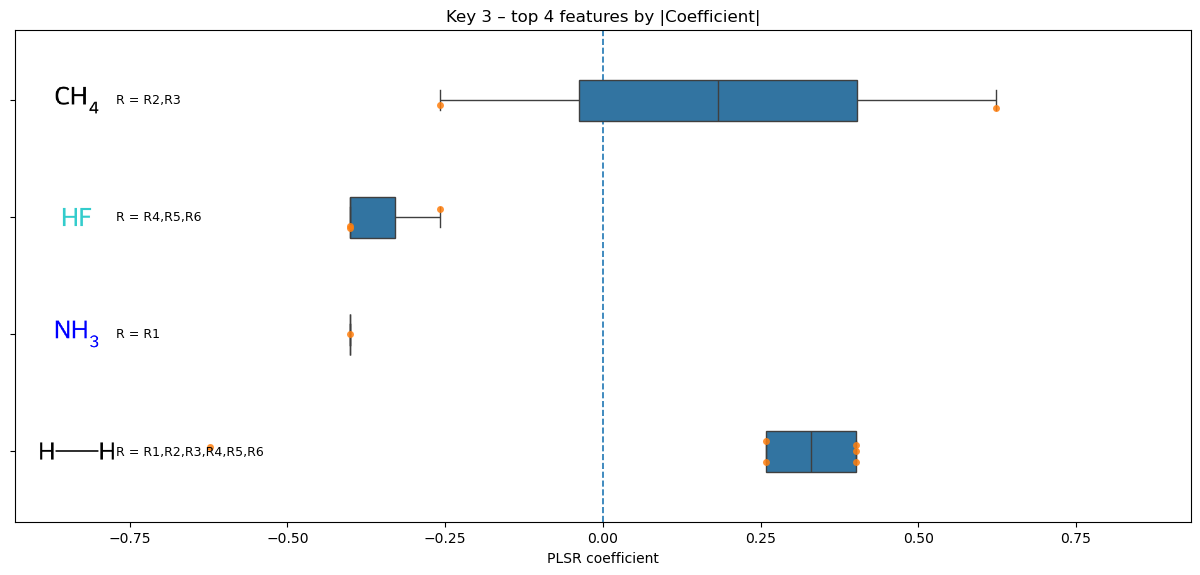


▶ Key = 3 | R_Location = R1


,ROMol,Feature,Coefficient,Absolute Coefficient,SMILES
0,<rdkit.Chem.rdchem.Mol object at 0x00000138125...,[H]N_R1_SMILES,-0.400953,0.400953,[H]N
1,<rdkit.Chem.rdchem.Mol object at 0x00000138125...,[H][H]_R1_SMILES,0.400953,0.400953,[H][H]



▶ Key = 3 | R_Location = R2


,ROMol,Feature,Coefficient,Absolute Coefficient,SMILES
0,<rdkit.Chem.rdchem.Mol object at 0x00000138125...,[H][H]_R2_SMILES,-0.622916,0.622916,[H][H]
1,<rdkit.Chem.rdchem.Mol object at 0x00000138125...,[H]C_R2_SMILES,0.622916,0.622916,[H]C



▶ Key = 3 | R_Location = R3


,ROMol,Feature,Coefficient,Absolute Coefficient,SMILES
0,<rdkit.Chem.rdchem.Mol object at 0x00000138125...,[H]C_R3_SMILES,-0.258246,0.258246,[H]C
1,<rdkit.Chem.rdchem.Mol object at 0x00000138125...,[H][H]_R3_SMILES,0.258246,0.258246,[H][H]



▶ Key = 3 | R_Location = R4


,ROMol,Feature,Coefficient,Absolute Coefficient,SMILES
0,<rdkit.Chem.rdchem.Mol object at 0x00000138125...,[H]F_R4_SMILES,-0.400953,0.400953,[H]F
1,<rdkit.Chem.rdchem.Mol object at 0x00000138125...,[H][H]_R4_SMILES,0.400953,0.400953,[H][H]



▶ Key = 3 | R_Location = R5


,ROMol,Feature,Coefficient,Absolute Coefficient,SMILES
0,<rdkit.Chem.rdchem.Mol object at 0x00000138125...,[H]F_R5_SMILES,-0.400953,0.400953,[H]F
1,<rdkit.Chem.rdchem.Mol object at 0x00000138125...,[H][H]_R5_SMILES,0.400953,0.400953,[H][H]



▶ Key = 3 | R_Location = R6


,ROMol,Feature,Coefficient,Absolute Coefficient,SMILES
0,<rdkit.Chem.rdchem.Mol object at 0x00000138125...,[H]F_R6_SMILES,-0.258246,0.258246,[H]F
1,<rdkit.Chem.rdchem.Mol object at 0x00000138125...,[H][H]_R6_SMILES,0.258246,0.258246,[H][H]


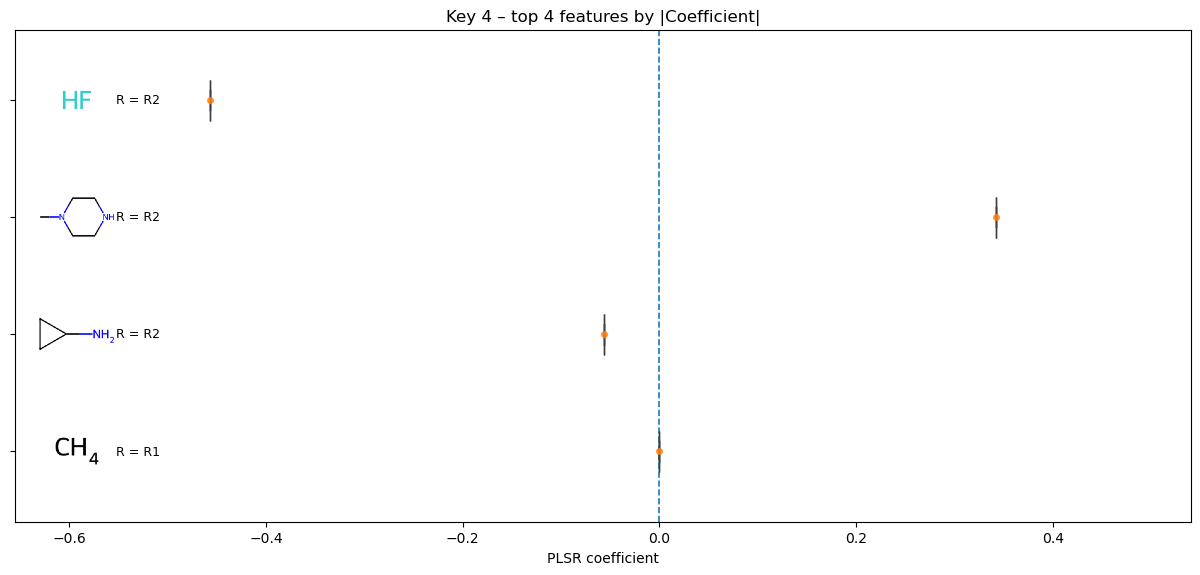


▶ Key = 4 | R_Location = R1


,ROMol,Feature,Coefficient,Absolute Coefficient,SMILES
0,<rdkit.Chem.rdchem.Mol object at 0x00000138125...,[H]C_R1_SMILES,0.0,0.0,[H]C



▶ Key = 4 | R_Location = R2


,ROMol,Feature,Coefficient,Absolute Coefficient,SMILES
0,<rdkit.Chem.rdchem.Mol object at 0x00000138125...,[H]F_R2_SMILES,-0.457115,0.457115,[H]F
1,<rdkit.Chem.rdchem.Mol object at 0x00000138125...,[H]C1(N)CC1_R2_SMILES,-0.056054,0.056054,[H]C1(N)CC1
2,<rdkit.Chem.rdchem.Mol object at 0x00000138125...,[H]N1CCN(C)CC1_R2_SMILES,0.342112,0.342112,[H]N1CCN(C)CC1


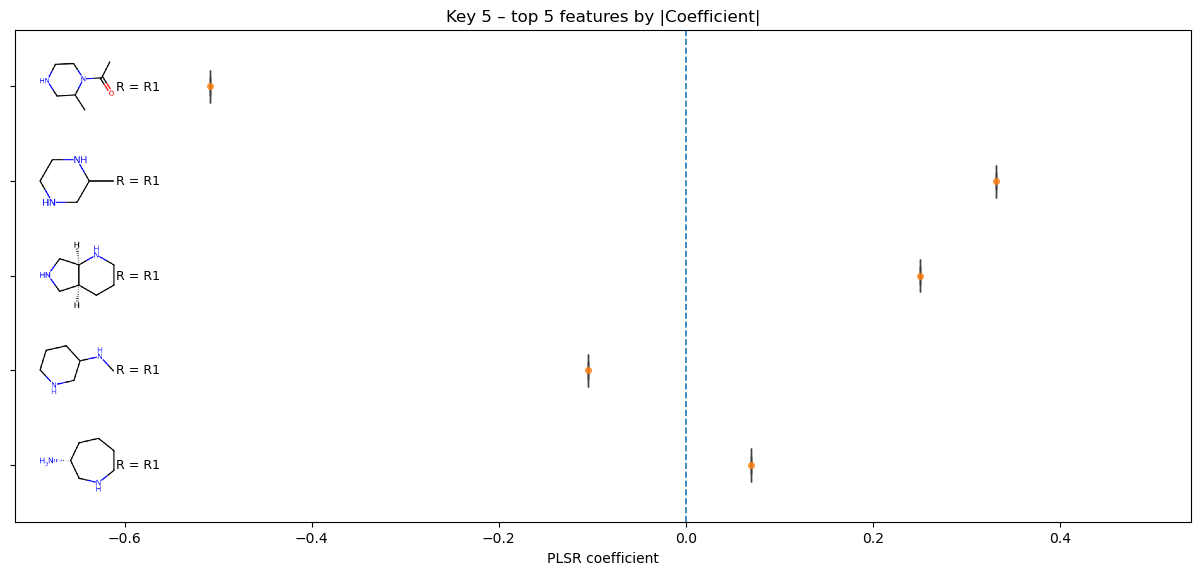


▶ Key = 5 | R_Location = R1


,ROMol,Feature,Coefficient,Absolute Coefficient,SMILES
0,<rdkit.Chem.rdchem.Mol object at 0x00000138125...,[H]N1CCN(C(C)=O)C(C)C1_R1_SMILES,-0.508981,0.508981,[H]N1CCN(C(C)=O)C(C)C1
1,<rdkit.Chem.rdchem.Mol object at 0x00000138125...,[H]N1CCCC(NC)C1_R1_SMILES,-0.104243,0.104243,[H]N1CCCC(NC)C1
2,<rdkit.Chem.rdchem.Mol object at 0x00000138125...,[H]N1C[C@@H]2NCCO[C@H]2C1_R1_SMILES,-0.050554,0.050554,[H]N1C[C@@H]2NCCO[C@H]2C1
3,<rdkit.Chem.rdchem.Mol object at 0x00000138125...,[H]N1CCC(N)C1_R1_SMILES,0.012291,0.012291,[H]N1CCC(N)C1
4,<rdkit.Chem.rdchem.Mol object at 0x00000138125...,[H]N1CCCC[C@@H](N)C1_R1_SMILES,0.069503,0.069503,[H]N1CCCC[C@@H](N)C1
5,<rdkit.Chem.rdchem.Mol object at 0x00000138125...,[H]N1C[C@@H]2CCCN[C@@H]2C1_R1_SMILES,0.250475,0.250475,[H]N1C[C@@H]2CCCN[C@@H]2C1
6,<rdkit.Chem.rdchem.Mol object at 0x00000138125...,[H]N1CCNC(C)C1_R1_SMILES,0.331509,0.331509,[H]N1CCNC(C)C1



▶ Key = 5 | R_Location = R2


,ROMol,Feature,Coefficient,Absolute Coefficient,SMILES
0,<rdkit.Chem.rdchem.Mol object at 0x00000138125...,[H]C#N_R2_SMILES,-0.050554,0.050554,[H]C#N
1,<rdkit.Chem.rdchem.Mol object at 0x00000138125...,[H]OC_R2_SMILES,-0.015620,0.015620,[H]OC
2,<rdkit.Chem.rdchem.Mol object at 0x00000138125...,[H]Cl_R2_SMILES,0.049076,0.049076,[H]Cl


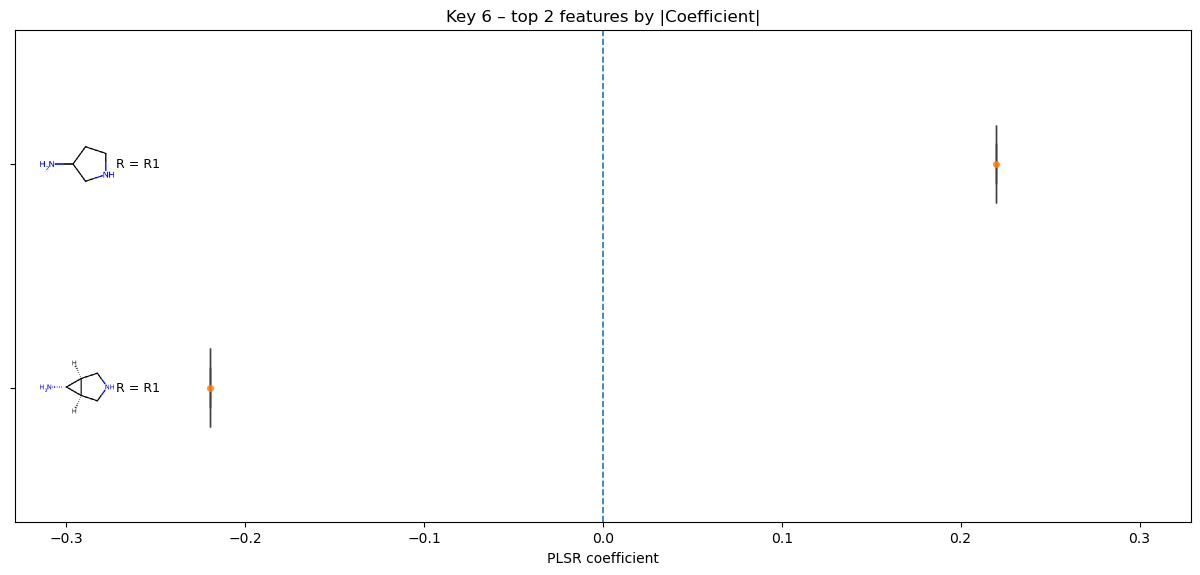


▶ Key = 6 | R_Location = R1


,ROMol,Feature,Coefficient,Absolute Coefficient,SMILES
0,<rdkit.Chem.rdchem.Mol object at 0x00000138125...,[H]N1C[C@@H]2[C@@H](N)[C@@H]2C1_R1_SMILES,-0.219722,0.219722,[H]N1C[C@@H]2[C@@H](N)[C@@H]2C1
1,<rdkit.Chem.rdchem.Mol object at 0x00000138125...,[H]N1CCC(N)C1_R1_SMILES,0.219722,0.219722,[H]N1CCC(N)C1


In [4]:
IPythonConsole.ipython_useSVG = True
PandasTools.ChangeMoleculeRendering(renderer='PNG')  # PNG or SVG

for coi in sorted(all_coefficients['Key'].dropna().unique()):
    globals()[f'coef_{int(coi)}'] = all_coefficients[all_coefficients['Key'] == coi].copy()

    temp = globals()[f'coef_{int(coi)}']

    coef_col = "Coefficient"
    smiles_col = "SMILES"
    top_n = 5
    mol_size = (130, 130)
    zoom = 0.45
    group_by_abs = "median"

    # build SMILES -> R_Location mapping
    if "R_Location" in temp.columns:
        loc_map = (
            temp.dropna(subset=["R_Location"])
                .groupby(smiles_col)["R_Location"]
                .apply(lambda s: ",".join(sorted(map(str, pd.unique(s)))))
                .to_dict()
        )
    else:
        loc_map = {}

    # select data from current 'Key'
    df = temp[[smiles_col, coef_col]].dropna(subset=[smiles_col, coef_col]).copy()
    if df.empty:
        print(f"Key {coi}: no valid rows for plotting, skip.")
    else:
        # select top_n SMILES based on |coef|
        grp = df.assign(abscoef=df[coef_col].abs()).groupby(smiles_col)["abscoef"]
        score = grp.median() if group_by_abs == "median" else grp.max()
        order = score.sort_values(ascending=False).head(top_n).index.tolist()
        plot_df = df[df[smiles_col].isin(order)].copy()

        # adjust canvas height according to top_n
        fig_height = max(6, len(order) * 0.9)
        fig, ax = plt.subplots(figsize=(14, fig_height))

        # boxplot
        sns.boxplot(
            data=plot_df, y=smiles_col, x=coef_col, order=order,
            orient='h', fliersize=0,
            width=0.35, linewidth=1.0,
            ax=ax
        )
        # stripplot
        sns.stripplot(
            data=plot_df, y=smiles_col, x=coef_col, order=order,
            orient='h', s=5, alpha=0.85, jitter=0.12, ax=ax
        )

        # x=0 in the middle
        ax.axvline(0, lw=1.2, ls='--', zorder=0)

        # replace 'names' with 'structures' on y axis
        ax.set_yticklabels([""] * len(order))
        ax.set_ylabel("")
        ax.set_xlabel("PLSR coefficient")
        ax.set_title(f"Key {int(coi)} – top {len(order)} features by |Coefficient|")

        # leave enough space for 'structures'
        xmin, xmax = ax.get_xlim()
        x_pad = (xmax - xmin) * 0.18
        ax.set_xlim(xmin - x_pad, xmax + x_pad)

        y_min, y_max = ax.get_ylim()
        ax.set_ylim(y_min + 0.1, y_max - 0.1)

        y_ticks = np.arange(len(order))
        x0 = (xmin - x_pad) + (x_pad * 0.40)

        # draw 'structures' and R_Location text
        for yi, smi in zip(y_ticks, order):
            mol = Chem.MolFromSmiles(smi)
            if mol is None:
                continue
            img = Draw.MolToImage(mol, size=mol_size)
            oi = OffsetImage(img, zoom=zoom)
            ab = AnnotationBbox(
                oi, (x0, yi), frameon=False,
                xycoords=('data', 'data'),
                box_alignment=(0.5, 0.5),
            )
            ax.add_artist(ab)

            # add R_Location label if available
            loc_text = loc_map.get(smi, None)
            if loc_text:
                ax.text(
                    x0 + x_pad * 0.25, yi,
                    f"R = {loc_text}",
                    va='center', ha='left',
                    fontsize=9
                )

        plt.subplots_adjust(top=0.88, right=0.92, bottom=0.06, left=0.08)
        plt.show()

    # print R_location info

    temp["mol"] = temp["SMILES"].apply(smiles_to_mol)

    for R in sorted(temp['R_Location'].unique()):
        print(f"\n▶ Key = {coi} | R_Location = {R}")

        subdf = (
            temp[temp["R_Location"] == R]
            .sort_values(by="Coefficient", ascending=True)
            .reset_index(drop=True)
        )

        subdf = subdf.rename(columns={'mol': 'ROMol'})
        display(subdf[['ROMol', 'Feature', 'Coefficient', 'Absolute Coefficient', 'SMILES']])
